<a href="https://colab.research.google.com/github/shobhitsundriyal/Heart_Attack_Predictor/blob/master/Heart_attack_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget "https://spotleai.sgp1.digitaloceanspaces.com/course/data/heart_disease_data.csv"

--2019-12-16 19:10:56--  https://spotleai.sgp1.digitaloceanspaces.com/course/data/heart_disease_data.csv
Resolving spotleai.sgp1.digitaloceanspaces.com (spotleai.sgp1.digitaloceanspaces.com)... 103.253.144.208
Connecting to spotleai.sgp1.digitaloceanspaces.com (spotleai.sgp1.digitaloceanspaces.com)|103.253.144.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/csv]
Saving to: ‘heart_disease_data.csv’

heart_disease_data. 100%[===================>]  10.77K  --.-KB/s    in 0s      

2019-12-16 19:10:56 (200 MB/s) - ‘heart_disease_data.csv’ saved [11024/11024]



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('heart_disease_data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [0]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

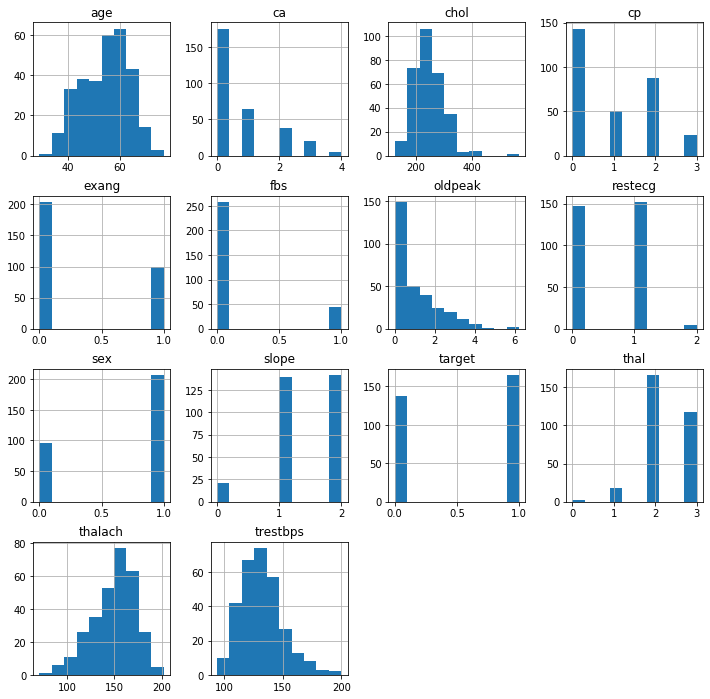

In [0]:
data.hist(figsize=(12,12))
plt.show()

In [0]:
nor = Normalizer()
nor.fit_transform(data)

array([[0.19745308, 0.00313418, 0.00940253, ..., 0.        , 0.00313418,
        0.00313418],
       [0.10874771, 0.00293913, 0.00587825, ..., 0.        , 0.00587825,
        0.00293913],
       [0.13682414, 0.        , 0.00333717, ..., 0.        , 0.00667435,
        0.00333717],
       ...,
       [0.23671899, 0.00348116, 0.        , ..., 0.00696232, 0.01044348,
        0.        ],
       [0.25352009, 0.00444772, 0.        , ..., 0.00444772, 0.01334316,
        0.        ],
       [0.1749685 , 0.        , 0.00306962, ..., 0.00306962, 0.00613925,
        0.        ]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target',axis=1), data['target'], test_size=0.30, random_state=42, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 13)
(212,)
(91, 13)
(91,)


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(180, 13)
(180,)
(32, 13)
(32,)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
lr = LogisticRegression(penalty='l1')
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Validation Accuracy: 0.84375


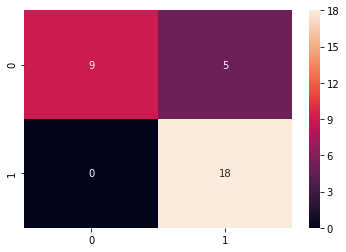

In [0]:
lr_pred = lr.predict(X_val)
lr_confusion = confusion_matrix(y_val, lr_pred,)
sns.heatmap(lr_confusion,annot=True)
print('Validation Accuracy: ' + str(accuracy_score(y_val, lr_pred,)))

Baseline accuracy: 0.84375

In [0]:
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Validation Accuracy Decision: 0.71875


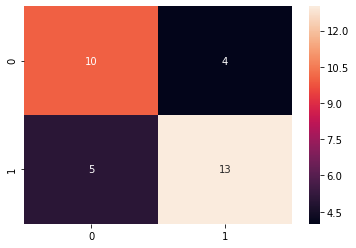

In [0]:
dt_default_pred = dt_default.predict(X_val)
dt_default_conf = confusion_matrix(y_val, dt_default_pred)
sns.heatmap(dt_default_conf,annot=True)
print('Validation Accuracy Decision: ' + str(accuracy_score(y_val, dt_default_pred)))

Actual Accuracy: 0.8131868131868132


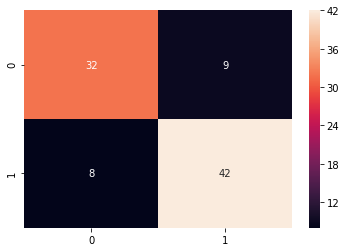

In [0]:
lr_pred_test = lr.predict(X_test)
lr_confusion_test = confusion_matrix(y_test, lr_pred_test,)
sns.heatmap(lr_confusion_test,annot=True)
print('Actual Accuracy: ' + str(accuracy_score(y_test, lr_pred_test,)))

Actual Accuracy Decision: 0.7362637362637363


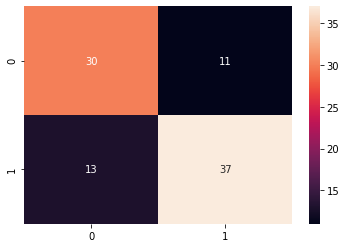

In [0]:
dt_default_pred_test = dt_default.predict(X_test)
dt_default_conf_test = confusion_matrix(y_test, dt_default_pred_test)
sns.heatmap(dt_default_conf_test,annot=True)
print('Actual Accuracy Decision: ' + str(accuracy_score(y_test, dt_default_pred_test)))